## Support Vector Regrssion (SVR)

In [ ]:
import numpy as np
import optuna
import sklearn.datasets as d
import pandas as pd
import sklearn
import sklearn.svm as svm
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions 

In [3]:
warnings.filterwarnings('ignore')
data = d.load_boston()

X,y = data.data, data.target

## row의 수: 506 / columns의 수: 14 / 타겟 변수: 본인 소유의 주택 가격 
## 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 사용해 본인 소유의 주택 가격 예측
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\JUNGINKIM\anaconda3\envs\class\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [33]:
## 선형 회귀 진행 

X_train,X_val,y_train,y_val = sklearn.model_selection.train_test_split(X,y,random_state=0)

svm_reg = svm.SVR(kernel='linear',C=1.0,epsilon=0.1)

svm_reg.fit(X_train,y_train)
y_pred = svm_reg.predict(X_val)

r2 = r2_score(y_val,y_pred)

print(r2)

0.5635479105806482


In [35]:
## 비선형 회귀 진행 

svm_non_reg = svm.SVR(kernel='poly',C=1.0,epsilon=0.1,degree=3,coef0=0.1)

svm_non_reg.fit(X_train,y_train)
y_pred_non = svm_non_reg.predict(X_val)

r2_v2 = r2_score(y_val,y_pred_non)

print(r2_v2)

0.10397216111777619


In [79]:
## grid search를 사용해 선형 회귀 hyperparameter tuning 진행 
import warnings 
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

svm_reg = svm.SVR(kernel='linear')
svr_parameters = {'C':[0.001,0.01,0.1,1,10,25,50,100],'epsilon':[0.1,0.3,0.5,0.8]}

grid_svr = GridSearchCV(svm_reg,param_grid=svr_parameters,cv=5,scoring='r2')

grid_svr.fit(X_train,y_train)

print('최적 파라미터:',grid_svr.best_params_)
print('최적 값:',grid_svr.best_score_)

result = pd.DataFrame(grid_svr.cv_results_['params'])
result['mean_test_score'] = grid_svr.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score',ascending=False)

최적 파라미터: {'C': 0.1, 'epsilon': 0.1}
최적 값: 0.7213985360521598


,C,epsilon,mean_test_score
8,0.100,0.1,0.721399
9,0.100,0.3,0.719814
14,1.000,0.5,0.718653
13,1.000,0.3,0.718626
15,1.000,0.8,0.718518
12,1.000,0.1,0.718407
10,0.100,0.5,0.717159
11,0.100,0.8,0.717138
19,10.000,0.8,0.707616
18,10.000,0.5,0.707162


In [80]:
## grid search를 사용해 비선형 회귀 hyperparameter tuning 진행 
import warnings 
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

svm_non_reg = svm.SVR(kernel='poly')
svr_non_parameters = {'C':[0.001,0.01,0.1,1,10,25,50,100],'epsilon':[0.1,0.3,0.5,0.8],'degree':[3,4,5],'coef0':[0.0,0.1,0.2,0.3]}

grid_svr_non = GridSearchCV(svm_non_reg,param_grid=svr_non_parameters,cv=5,scoring='r2')

grid_svr_non.fit(X_train,y_train)

print('최적 파라미터:',grid_svr_non.best_params_)
print('최적 값:',grid_svr_non.best_score_)

result = pd.DataFrame(grid_svr_non.cv_results_['params'])
result['mean_test_score'] = grid_svr_non.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score',ascending=False)

최적 파라미터: {'C': 100, 'coef0': 0.3, 'degree': 5, 'epsilon': 0.8}
최적 값: 0.6028161014290282


,C,coef0,degree,epsilon,mean_test_score
383,100.000,0.3,5,0.8,0.602816
382,100.000,0.3,5,0.5,0.602089
381,100.000,0.3,5,0.3,0.599262
380,100.000,0.3,5,0.1,0.595274
377,100.000,0.3,4,0.3,0.585041
...,...,...,...,...,...
14,0.001,0.1,3,0.5,-0.017833
1,0.001,0.0,3,0.3,-0.018281
3,0.001,0.0,3,0.8,-0.019093
0,0.001,0.0,3,0.1,-0.019417


## PCA 진행 및 plot 그리기

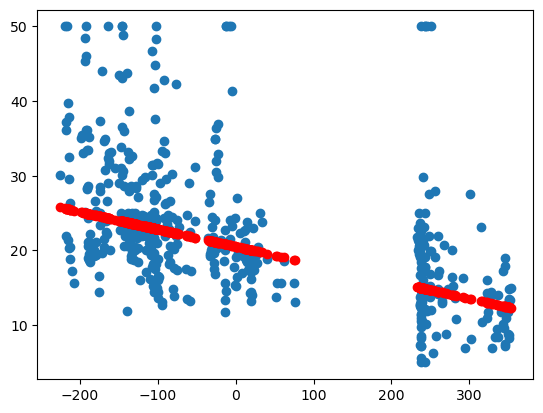

In [111]:
## SVR - linear

from sklearn.decomposition import PCA

model_best_params = grid_svr.best_params_
model_best_params['kernel'] = 'linear'
model_best_params['gamma'] = 'scale'

model = svm.SVR(**model_best_params)
pca = PCA(n_components=1)
pca_X = pca.fit_transform(X)

model.fit(pca_X,y)
y_pred = model.predict(pca_X)

plt.scatter(pca_X,y)
plt.scatter(pca_X,y_pred,color='r')

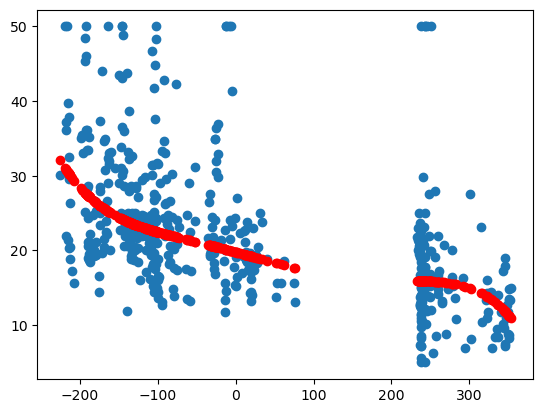

In [110]:
## SVR - kernel(poly)

from sklearn.decomposition import PCA

model_best_params = grid_svr_non.best_params_
model_best_params['kernel'] = 'poly'

model_non = svm.SVR(**model_best_params)
pca = PCA(n_components=1)
pca_X = pca.fit_transform(X)

model_non.fit(pca_X,y)
y_pred = model_non.predict(pca_X)

plt.scatter(pca_X,y)
plt.scatter(pca_X,y_pred,color='r')